<a href="https://colab.research.google.com/github/polinaproskura/NLP_ensembles/blob/main/BERT_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
! pip install datasets
! pip install transformers
! pip install accelerate -U
clear_output()

In [ ]:
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer, set_seed
from sklearn.metrics import accuracy_score
from datasets import load_dataset
import numpy as np

In [ ]:
set_seed(42)
imdb = load_dataset("imdb")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)
tokenized_imdb = imdb.map(preprocess_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    seed=123,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_imdb["train"],
    eval_dataset=tokenized_imdb["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'classifier.

Step,Training Loss
500,0.328800


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 21>:21                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1645 in train                    │
│                                                                                                  │
│   1642 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1643 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1644 │   │   )                                                                                 │
│ ❱ 1645 │   │   return inner_training_loop(                                                       │
│   1646 │   │   │   args=args,                                                                    │
│   1647 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1648 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1938 in _inner_training_loop     │
│                                                                                                  │
│   1935 │   │   │   │   │   self.control = self.callback_handler.on_step_begin(args, self.state,  │
│   1936 │   │   │   │                                                                             │
│   1937 │   │   │   │   with self.accelerator.accumulate(model):                                  │
│ ❱ 1938 │   │   │   │   │   tr_loss_step = self.training_step(model, inputs)                      │
│   1939 │   │   │   │                                                                             │
│   1940 │   │   │   │   if (                                                                      │
│   1941 │   │   │   │   │   args.logging_nan_inf_filter                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:2770 in training_step            │
│                                                                                                  │
│   2767 │   │   │   with amp.scale_loss(loss, self.optimizer) as scaled_loss:                     │
│   2768 │   │   │   │   scaled_loss.backward()                                                    │
│   2769 │   │   else:                                                                             │
│ ❱ 2770 │   │   │   self.accelerator.backward(loss)                                               │
│   2771 │   │                                                                                     │
│   2772 │   │   return loss.detach() / self.args.gradient_accumulation_steps                      │
│   2773                                                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:1821 in backward               │
│                                                                                                  │
│   1818 │   │   elif self.scaler is not None:                                                     │
│   1819 │   │   │   self.scaler.scale(loss).backward(**kwargs)                                    │
│   1820 │   │   else:                                                                             │
│ ❱ 1821 │   │   │   loss.backward(**kwargs)                                                       │
│   1822 │                                                   

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! cp -r results/checkpoint-7500/ gdrive/MyDrive/results_bert_6

In [ ]:
def load_trainer(number, seed):
    model = AutoModelForSequenceClassification.from_pretrained("gdrive/MyDrive/results_bert_" + str(number) + "/")
    training_args = TrainingArguments(
        output_dir="./results",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=5,
        weight_decay=0.01,
        seed=seed,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_imdb["train"],
        eval_dataset=tokenized_imdb["test"],
        tokenizer=tokenizer,
        data_collator=data_collator,
    )
    return trainer, model

In [ ]:
trainer, model = load_trainer(6, 123)

In [ ]:
predictions = trainer.predict(tokenized_imdb["test"])

In [ ]:
def accuracy_rejection(N, step, probs, true_labels, predicted_labels):
    idx = np.argsort(probs)[::-1]
    r_rate = [0]
    r_accuracy = [accuracy_score(true_labels, predicted_labels)]
    for i in range(step, N, step):
        idx = idx[:(N - i)]
        r_rate.append(i / N)
        r_accuracy.append(accuracy_score(true_labels[idx], predicted_labels[idx]))
    return r_rate, r_accuracy

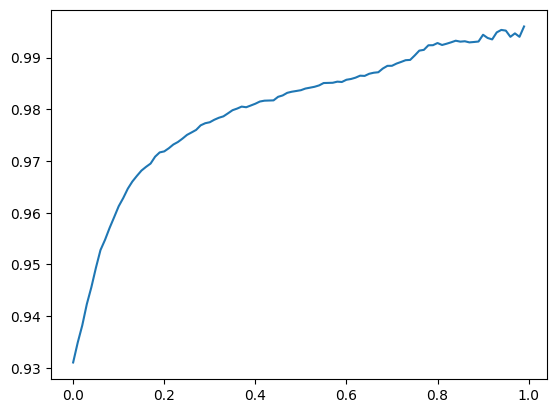

In [ ]:
import matplotlib.pyplot as plt
mx_val = max(predictions.predictions.ravel().max(), np.abs(predictions.predictions.ravel().min()))
predicted_labels = np.argmax(predictions.predictions, axis=1)
sigmoid = predictions.predictions# / mx_val#1 / (1 + np.exp(predictions.predictions))
x, y = accuracy_rejection(N=len(sigmoid), step=int(len(sigmoid)/100), probs=np.max(sigmoid, axis=1), true_labels=predictions.label_ids, predicted_labels=predicted_labels)
plt.plot(x, y)

In [ ]:
np.savetxt("./gdrive/MyDrive/results_bert_1/predictions.csv", predictions.predictions, delimiter=",")
np.savetxt("./gdrive/MyDrive/results_bert_1/label_ids.csv", predictions.label_ids, delimiter=",")

In [ ]:
predictions

PredictionOutput(predictions=array([[ 3.6516256 , -4.101687  ],
       [ 3.7286537 , -4.1001635 ],
       [ 3.5372543 , -3.8614397 ],
       ...,
       [-1.1561122 ,  0.72252434],
       [-3.7757657 ,  3.2243404 ],
       [-3.7578402 ,  3.1590726 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 1, 1, 1]), metrics={'test_loss': 0.3674376308917999, 'test_runtime': 410.012, 'test_samples_per_second': 60.974, 'test_steps_per_second': 3.812})

In [ ]:
accuracy_score(np.argmax(predictions.predictions, axis=1), predictions.label_ids)

0.93304